In [88]:
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [122]:
def parse_output(out):
    sizes = []
    times = []
    for index in range(0, len(out), 2):
        sizes.append(int(out[index]))
        times.append(int(out[index + 1]))
    return (sizes, times)


# Sheet 1

xtp778 - Jens Egholm Pedersen

Code is available for inspection here: https://github.com/Jegp/pfp-assignment1

## 1.1

In [194]:
%%bash
echo "[23,45,-23,44,23,54,23,12,34,54,7,2, 4,67] \
      [-2, 3, 4,57,34, 2, 5,56,56, 3,3,5,77,89]" | ./assignment1

73i32


## 1.2

In [70]:
# Generate data
!for s in 100 1000 10000 100000 1000000 5000000 10000000; do futhark-dataset -g "[$s]i32" -g "[$s]i32" > "$s.dat"; done

In [164]:
# Compile and process data for C
!futhark-c assignment1.fut
out_1_c = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1 -t /dev/stderr > /dev/null < "$s.dat"; done
(c_1_sizes, c_1_times) = parse_output(out_1_c)

In [165]:
# Compile and process data for OpenCL
!futhark-opencl assignment1.fut
out_1_o = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1 -t /dev/stderr > /dev/null < "$s.dat"; done
(o_1_sizes, o_1_times) = parse_output(out_1_o)

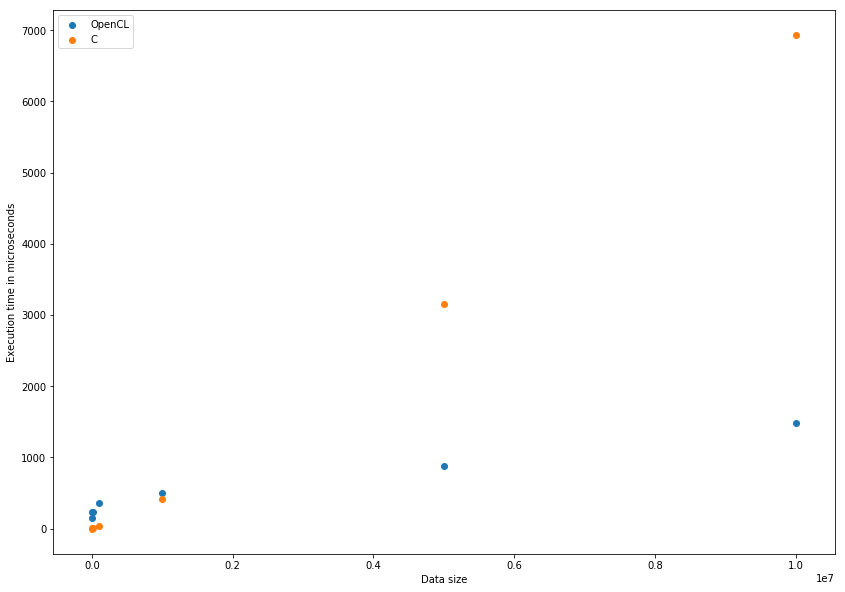

In [200]:
plt.figure(figsize=(14,10))
plt.scatter(x = o_1_sizes, y = o_1_times)
plt.scatter(x = c_1_sizes, y = c_1_times)
plt.xlabel("Data size")
plt.ylabel("Execution time in microseconds")
plt.legend(["OpenCL", "C"])

This code was run an an Asus X550V laptop, with a GeForce GTX 950M graphics card and an i7-6700HQ 2.60GHz Intel CPU

## 1.3

In [127]:
!echo "[23,45,-23,44,23,54,23,12,34,54,7,2, 4,67] [-2, 3, 4,57,34, 2, 5,56,56, 3,3,5,77,89]" | ./assignment1.3

73i32
12i32


The result shows that the largest difference between any two points (at the same index) is 73, and that the number is located at index 12.

In [173]:
# Compile and process data for C
!futhark-c assignment1.3.fut
out_1_3_c = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1.3 -t /dev/stderr > /dev/null < "$s.dat"; done
(c_1_3_sizes, c_1_3_times) = parse_output(out_1_3_c)

In [174]:
# Compile and process data for OpenCL
!futhark-opencl assignment1.3.fut
out_1_3_o = !for s in 100 1000 10000 100000 1000000 5000000 10000000; do echo $s && ./assignment1.3 -t /dev/stderr > /dev/null < "$s.dat"; done
(o_1_3_sizes, o_1_3_times) = parse_output(out_1_3_o)

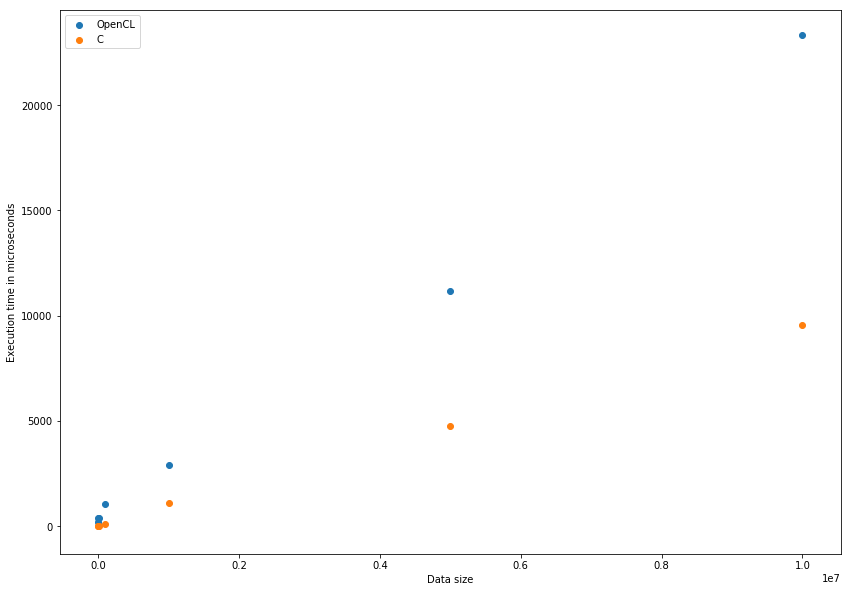

In [201]:
plt.figure(figsize=(14,10))
plt.scatter(x = o_1_3_sizes, y = o_1_3_times)
plt.scatter(x = c_1_3_sizes, y = c_1_3_times)
plt.xlabel("Data size")
plt.ylabel("Execution time in microseconds")
plt.legend(["OpenCL", "C"])

The above figure shows that this scales linearly for both OpenCL and C, since the points in both cases are close to straight line. As opposed to scaling in polynomial or exponential complexity.

That said, I find the above result weird. The code is not very different from the code run in 1.1, yet C is consistently winning across different runs.

## 1.4

$$(v_1, f_1) \oplus' (v_2, f_2) = (if \: f_2 \: then \: v_2 \:else \: v_1 \oplus v_2, f_1 \vee f_2)$$ 

If $(0, False)$ is left neutral, then the following should apply:

$$(0, False) \oplus' (v_2, f_2)$$

$$= (if \: f_2 \: then \: v_2 \: else \: 0 \oplus v_2, False \vee f_2)$$

$$= (v_2, f_2)$$

We can then conclude that $(0, False)$ is indeed left neutral.

## 2.1

In [15]:
! echo "0.1" | ./assignment2.3 | ./viz.sh

0000100000000000000000000000000000000000000000000000000000000000000000
0000011000000000000000000000000000000000000000000000000000000000000000
0000000110000000000000000000100000000000000000000000000000000000000000
0000000001110000000000000001110000000000000000000000000000000000000000
0000000000001100000000000001000000000000000000000000000000000000000000
0000000000000011100000000011000000000000000000000000000000000000000000
0000000000000000011000001101000000000000000000000000000000000000000000
0000010000000000000110010001000000000000000000000000000000000000000000
0000010000000000000001110001000000000000000000000000000000000000000000
0000010000000000000011001101000000000000000000000000000000000000000000
0000010000000000000100000011100000000000000000000000000000000000000000
0000010000000000001000000001011000000000000000000000000000000000000000
0000010000000000110000000001000110000000000000000000000000000000000000
0000010000000001000000000001000001110000000000000000000000000000000000
000001

In [16]:
! echo "0.4" | ./assignment2.3 | ./viz.sh

0000000001000000000100000000000010000000000000000000000000000000000000
0000000001000000000011000000000111000000000000000000000000000000000000
0000000001000000000000100000011100000000000000000000000000000000000000
0000000010000000000000010011101000000000000000000000000000000000000000
0000000010000000000000001100001000000000000000000000000000000000000000
0000000010000000000000110100010000000000000000000000000000000000000000
0000000100000000000111000011010000000000000000000000000000000000000000
0000000100000000011000000000100000000000000000000000000000000000000000
0000001110000001100000000000110000000000000000000000000000000000000000
0000000101101110000000000001001000000000000000000000000000000000000000
0000001000111000000000000001000110000000000000000000000000000000000000
0000001011000111000000000001000001000000000000000000000000000000000000
0000011100000000110000000010000000100000000000000000000000000000000000
0001110000000000001100000010000000010000000000000000000000000000000000
011000

In [17]:
! echo "0.8" | ./assignment2.3 | ./viz.sh

0000000000100100000000000000001000000010000000000000000000000000000000
0001111111111111111111111111111111111110000000000000000000000000000000
0000000010000001000000000000000100001000000000000000000000000000000000
0000000000000000100000000000000010010000000000000000000000000000000000
0000000000000000010000000000000010100000000000000000000000000000000000
0000000000000000001000000000000001000000000000000000000000000000000000
0000000000000000000100000000000011000000000000000000000000000000000000
0000000000000000000010000000000100100000000000000000000000000000000000
0000000000000000000001000000001000100000000000000000000000000000000000
0000000000000000000000000000010000010000000000000000000000000000000000
0000000000000000000000000000100000010000000000000000000000000000000000
0000000000000000000000000001000000001000000000000000000000000000000000
0000000000000000000000000010000000001000000000000000000000000000000000
0000000000000000000000000100000000000100000000000000000000000000000000
000000

# 3.2

In [156]:
# Generate the dataset
!for s in 100 10000 1000000; do futhark-dataset --f32-bounds='0:2' -g "[$s]f32" -g "[$s]f32" > "pi$s.dat"; done

In [179]:
# Compile and process data for C
!futhark-c assignment3.1.fut
out_3_1_c = !for s in 100 10000 1000000; do echo $s && ./assignment3.1 -t /dev/stderr > /dev/null < "pi$s.dat"; done
(c_3_1_sizes, c_3_1_times) = parse_output(out_3_1_c)

In [180]:
# Compile and process data for OpenCL
!futhark-opencl assignment3.1.fut
out_3_1_o = !for s in 100 10000 1000000; do echo $s && ./assignment3.1 -t /dev/stderr > /dev/null < "pi$s.dat"; done
(o_3_1_sizes, o_3_1_times) = parse_output(out_3_1_o)

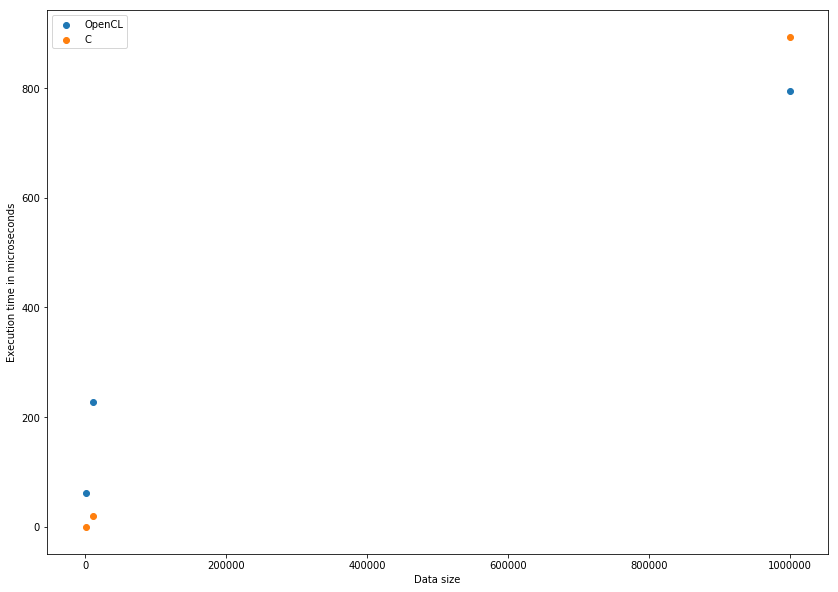

In [202]:
plt.figure(figsize=(14,10))
plt.scatter(x = o_3_1_sizes, y = o_3_1_times)
plt.scatter(x = c_3_1_sizes, y = c_3_1_times)
plt.xlabel("Data size")
plt.ylabel("Execution time in microseconds")
plt.legend(["OpenCL", "C"])

# 3.3

In [176]:
# Compile and process data for C
!futhark-c assignment3.3.fut
out_3_3_c = !for s in 100 10000 1000000; do echo $s && ./assignment3.3 -t /dev/stderr > /dev/null < "pi$s.dat"; done
(c_3_3_sizes, c_3_3_times) = parse_output(out_3_3_c)

In [177]:
# Compile and process data for OpenCL
!futhark-opencl assignment3.3.fut
out_3_3_o = !for s in 100 10000 1000000; do echo $s && ./assignment3.3 -t /dev/stderr > /dev/null < "pi$s.dat"; done
(o_3_3_sizes, o_3_3_times) = parse_output(out_3_3_o)

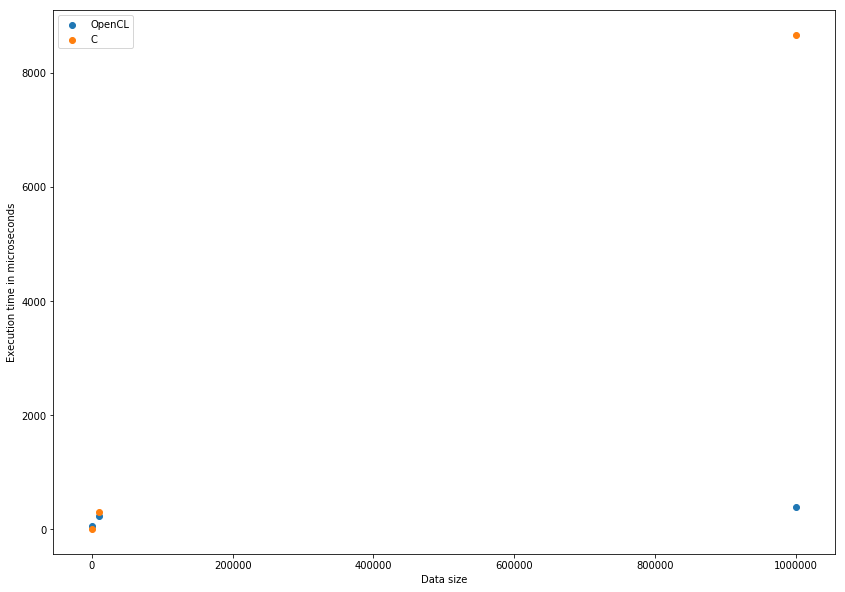

In [203]:
plt.figure(figsize=(14,10))
plt.scatter(x = o_3_3_sizes, y = o_3_3_times)
plt.scatter(x = c_3_3_sizes, y = c_3_3_times)
plt.xlabel("Data size")
plt.ylabel("Execution time in microseconds")
plt.legend(["OpenCL", "C"])

In this case the OpenCL implementation drastically outperforms C. The code is also relatively simpler and only performs one loop through the data, compared to my implementation of 3.1. Futhark is able to parallelise the effort, so the runtime is much less than ``O(n)``.

# Appendix A: Code

In [185]:
# %load assignment1.fut
let process (xs: []i32) (ys: []i32): i32 =
  let diff (x: i32, y: i32) : i32 = i32.abs (x - y)
  in reduce i32.max 0 (map diff (zip xs ys))

let main(s1:[]i32, s2:[]i32): i32 = process s1 s2


In [186]:
# %load assignment1.3.fut
let process_idx [n] (xs: [n]i32) (ys: [n]i32): (i32, i32) =
  let diff (x: i32, y: i32, i:i32) : (i32, i32) = (i32.abs (x - y), i)
  let t_max (t1:(i32, i32)) (t2:(i32, i32)): (i32, i32) =
    if t1.1 > t2.1 then t1 else t2
  let index_list : [n](i32, i32) = map diff (zip xs ys (iota n))
  in reduce t_max (0, 0) index_list

let main(s1:[]i32, s2:[]i32): (i32, i32) = process_idx s1 s2


In [187]:
# %load assignment2.1.fut
import "/futlib/math"

type point = (i32,i32)
type line = (point,point)
type points = []point

-- Exercise 2.1
-- Translates points
let transl_point (x: i32, y: i32) ((tx, ty):point): point =
  (x + tx, y + ty)

let transl_line ((p1, p2):line) (t:point):line =
  (transl_point p1 t, transl_point p2 t)

-- Translate all lines in an image with the offset given in ``offset``
let transl_lines [n] (lines:[n]line) (offset:point) : [n]line =
  map (\line -> transl_line line offset) lines


In [188]:
# %load assignment2.2.fut
import "/futlib/math"

type point = (i32,i32)
type line = (point,point)
type points = []point

-- Formula: (x′,y′) = (x cos f − y sin f , y cos f + x sin f)
let rotate_point ((x, y):point) (r:f32) =
  let cosx = i32.f32(f32.cos(r))
  let siny = i32.f32(f32.sin(r))
  in (x * cosx - y * siny, y * cosx + x * siny)


In [189]:
# %load assignment2.3.fut
import "/futlib/math"

type point = (i32,i32)
type line = (point,point)
type points = []point

let compare (v1:i32) (v2:i32) : i32 =
  if v2 > v1 then 1 else if v1 > v2 then -1 else 0

let slo ((x1,y1):point) ((x2,y2):point) : f32 =
  if x2==x1 then if y2>y1 then 1f32 else -1f32
                 else r32(y2-y1) / f32.abs(r32(x2-x1))

let linepoints ((x1,y1):point, (x2,y2):point) : points =
  let len = 1 + i32.max (i32.abs(x2-x1)) (i32.abs(y2-y1))
  let xmax = i32.abs(x2-x1) > i32.abs(y2-y1)
  let (dir,slop) =
    if xmax then (compare x1 x2, slo (x1,y1) (x2,y2))
    else (compare y1 y2, slo (y1,x1) (y2,x2))
  in map (\i -> if xmax then (x1+i*dir, y1+t32(slop*r32(i)))
                else (x1+t32(slop*r32(i)), y1+i*dir)) (iota len)

-- Write to grid
let update [h] [w] [n] (grid:*[h][w]i32)(xs:[n]i32)(ys:[n]i32):*[h][w]i32 =
  let is = map (\x y -> w*y+x) xs ys
  let flatgrid = reshape (h*w) grid
  let ones = map (\ _ -> 1) is
  in reshape (h,w) (scatter flatgrid is ones)

-- Sequential algorithm for drawing multiple lines
let drawlines [h] [w] [n] (grid: *[h][w]i32) (lines:[n]line) : [h][w]i32 =
  loop (grid) for i < n do -- find points for line i
    let (xs,ys) = unzip (linepoints (lines[i]))
in update grid xs ys

-- Assignment 2.3

-- Translates points
let transl_point (x: i32, y: i32) ((tx, ty):point): point =
  (x + tx, y + ty)

let transl_line ((p1, p2):line) (t:point):line =
  (transl_point p1 t, transl_point p2 t)

-- Formula: (x′,y′) = (x cos f − y sin f , y cos f + x sin f)
let rotate_point ((x, y):point) (r:f64): point =
  let cosx = f64.cos(r)
  let siny = f64.sin(r)
  let fx = f64.i32(x)
  let fy = f64.i32(y)
  in (i32.f64(fx * cosx - fy * siny), i32.f64(fy * cosx + fx * siny))

let rotate_line ((p1, p2):line) (r:f64): line =
  (rotate_point p1 r, rotate_point p2 r)

let rotate_lines_center [n] (lines:[n]line) (center:point) (r:f64): []line =
  let neg_center = (-center.1, -center.2)
  let centered = map (\line -> transl_line line neg_center) lines
  let rotated = map (\line -> rotate_line line r) centered
  in map (\line -> transl_line line center) rotated

-- Test on image
let main (r:f64) : [][]i32 =
  let height:i32 = 30
  let width:i32 = 70
  let grid : *[][]i32 = replicate height (replicate width 0)
  let lines = [((58,20),(2,3)),((27,3),(2,28)),((5,20),(20,20)),
               ((4,10),(6,25)),((26,25),(26,2))]
  let rotated = rotate_lines_center lines (width / 2, height / 2) r
in drawlines grid rotated


In [190]:
# %load assignment3.1.fut
import "/futlib/math"

type dart = (f32,f32)

let inside(x:f32) (y:f32): bool =
  ((x - 1.0f32)**2.0f32 + (y - 1.0f32)**2.0f32) <= 1f32

let estimate_pi [n] (xs:[n]f32) (ys:[n]f32): f64 =
  let is_inside = map (\i -> i32.bool (inside xs[i] ys[i])) (iota n)
  let length = reduce (\s l -> s + l) 0 is_inside
  in (f64.i32(length) / f64.i32(n)) * 4.0

let main (xs:[]f32) (ys:[]f32): f64 = estimate_pi xs ys


In [191]:
# %load assignment3.3.fut
import "/futlib/math"

let f(x:f32) (y:f32) : f32 =
  2.0f32*x*x*x*x*x*x*y*y - x*x*x*x*x*x*y
  + 3.0f32*x*x*x*y*y*y - x*x*y*y*y +
  x*x*x*y - 3.0f32*x*y*y + x*y -
  5.0f32*y + 2.0f32*x*x*x*x*x*y*y*y*y -
  2.0f32*x*x*x*x*x*y*y*y*y*y + 250.0f32

let calc_bin (x:f32) (y:f32) (width:f32) =
  (f x y) * width * width -- expand in two dimensions

let estimate_area [n] (xs:[n]f32) (ys:[n]f32): f32 =
  let bin_width: f32 = 2f32 / f32.i32(n)
  let areas = map (\i -> calc_bin xs[i] ys[i] bin_width) (iota n)
  in reduce (+) 0.0f32 areas

let main [n] (xs:[n]f32) (ys:[]f32): f32 = 
  (estimate_area xs ys) * 4.0f32 / f32.i32(n)